In [2]:
#from __future__ import print_function

import numpy as np
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('classic')
mpl.rcParams['axes.xmargin'] = 0.0
mpl.rcParams['axes.ymargin'] = 0.0

%matplotlib notebook

In [3]:
def warmUpExercise ():
    return (np.identity (5))

In [4]:
print ('Running warmUpExercise ...')
print ('5x5 Identity Matrix:')
warmUpExercise ()

Running warmUpExercise ...
5x5 Identity Matrix:


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [5]:
data = np.genfromtxt ('ex1data1.txt', delimiter=',')
X = data[:, 0:1]
y = data[:, 1:]
m = len (y)

<IPython.core.display.Javascript object>


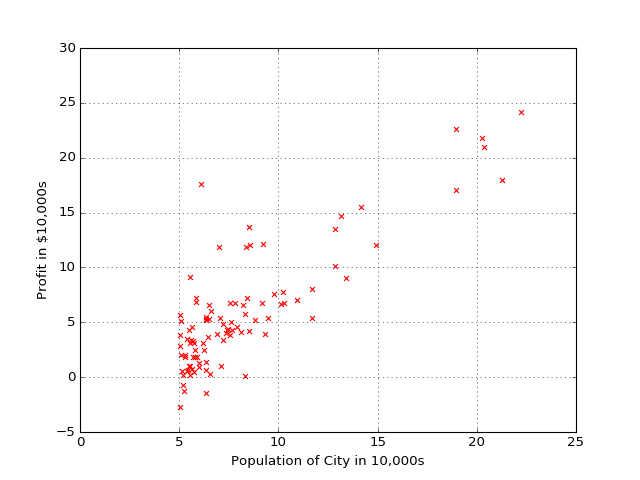

In [6]:
plt.figure ()
plt.scatter (X.T[0], y.T[0], marker='x', color='r')
plt.xlabel ('Population of City in 10,000s')
plt.ylabel ('Profit in $10,000s')
plt.grid ()

In [7]:
X = np.hstack ((np.ones ((len (X), 1)), X))
theta = np.zeros ((2, 1))

iterations = 1500
alpha = 0.01

In [8]:
def computeCost (X, y, theta):
    m = len (y)
    h = X.dot (theta)
    sqrRes = np.power (h - y, 2)
    J = 1. / (2.*m) * sqrRes.sum ()
    return (J)

def gradientDescent (X, y, theta, alpha, num_iters):
    m = len (y)
    J_history = np.zeros (num_iters)
    
    for i in range (num_iters):
        J_iter = computeCost (X, y, theta)
        theta -= (alpha / m) * np.dot ((X.dot (theta) - y).T, X).T
        J_history[i] = J_iter
        
    return (theta, J_history)


In [9]:
computeCost (X, y, theta)
theta, J_history = gradientDescent (X, y, theta, alpha, iterations)

<IPython.core.display.Javascript object>


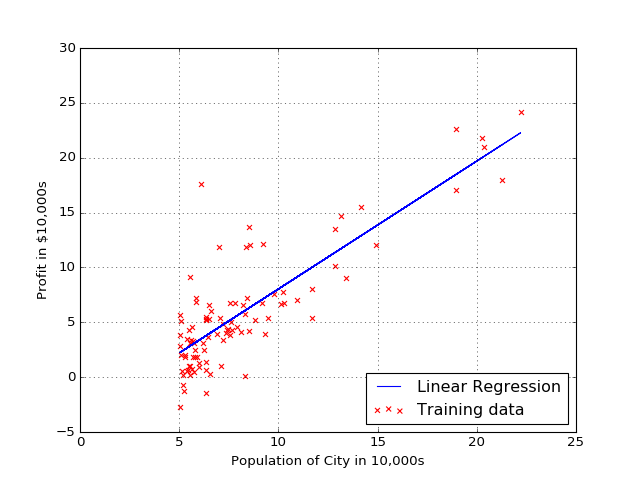

In [10]:
plt.figure ()
plt.scatter (X.T[1], y.T[0], marker='x', color='r', label='Training data')
plt.plot (X.T[1], X.dot (theta), label='Linear Regression')
plt.xlabel ('Population of City in 10,000s')
plt.ylabel ('Profit in $10,000s')
plt.legend(loc='lower right')
plt.grid ()

In [11]:
print ('For population = 35,000, we predict a profit of ${0:.2f}'.format (10000*np.array ([[1, 3.5]]).dot (theta)[0,0]))
print ('For population = 70,000, we predict a profit of ${0:.2f}'.format (10000*np.array ([[1, 7.]]).dot (theta)[0,0]))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45


In [12]:
theta0_vals = np.linspace (-10, 10, 50)
theta1_vals = np.linspace (-1, 4, 50)

J_vals = np.zeros ((len (theta0_vals), len (theta1_vals)))

for i in range (len (theta0_vals)):
    for j in range (len (theta1_vals)):
        theta_temp = np.array ([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = computeCost (X, y, theta_temp)       

<IPython.core.display.Javascript object>


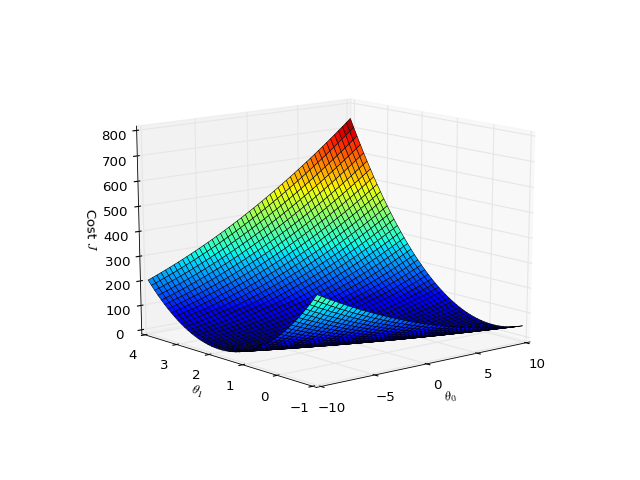

In [15]:
theta0_grid, theta1_grid = np.meshgrid (theta0_vals, theta1_vals, indexing='ij')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface (theta0_grid, theta1_grid, J_vals, 
                 rstride=1, cstride=1,
                 linewidth=0.5,
                 vmin=0., vmax=J_vals.max (),
                 cmap=mpl.cm.jet)
ax.set_xlabel (r'$\theta_0$')
ax.set_ylabel (r'$\theta_1$')
ax.set_zlabel (r'Cost $J$')
ax.view_init(elev=15, azim=230)

<IPython.core.display.Javascript object>


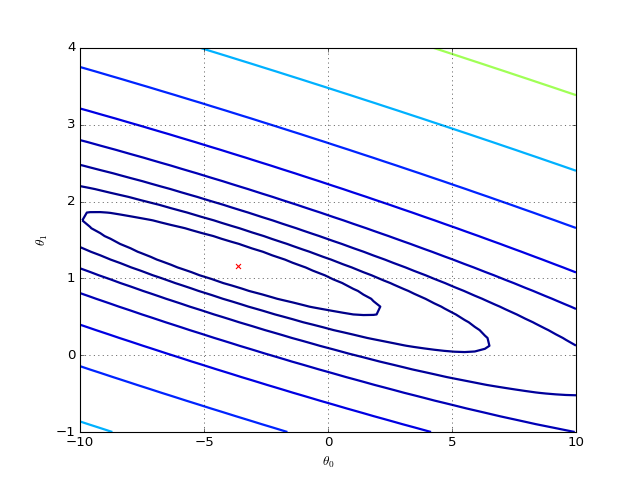

In [16]:
plt.figure ()
plt.contour (theta0_grid, theta1_grid, J_vals,
             levels=np.logspace (-2, 3, 20),
             cmap=mpl.cm.jet, linewidths=2)
plt.scatter (theta[0], theta[1], marker='x', color='r')
plt.xlabel (r'$\theta_0$')
plt.ylabel (r'$\theta_1$')
plt.xlim (-10, 10)
plt.ylim (-1, 4)
plt.grid ()

In [17]:
data = np.genfromtxt ('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:]
m = len (y)

In [18]:
def featureNormalize (X):
    X_norm = X.copy ()
    mu = np.mean (X, axis=0)
    sigma = np.std (X, axis=0)
    
    for i in range (len (X)):
        X_norm[i] = (X[i] - mu) / sigma
        
    return (X_norm, mu, sigma)

In [19]:
X, mu, sigma = featureNormalize (X)
X = np.hstack ((np.ones ((len (X), 1)), X))

In [20]:
alpha = 1.
iterations = 400

theta = np.zeros ((3, 1))
theta, J_history = gradientDescent (X, y, theta, alpha, iterations)

<IPython.core.display.Javascript object>


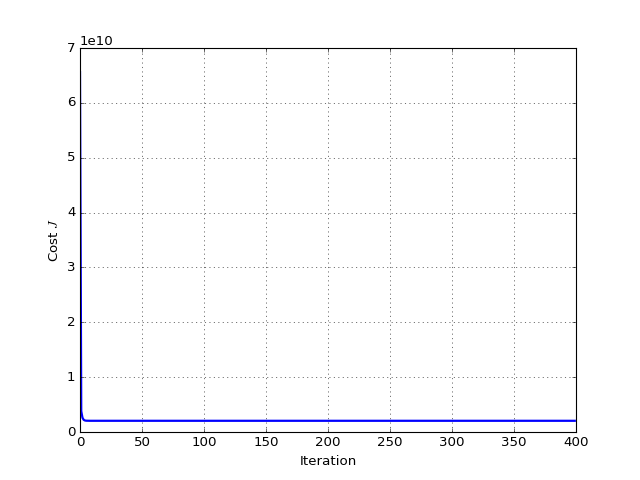

In [21]:
plt.figure ()
plt.plot (J_history, color='b', lw=2)
plt.xlabel ('Iteration')
plt.ylabel (r'Cost $J$')
plt.grid ()

In [22]:
print ('Theta computed from gradient descent:')
print (theta.T[0])

Theta computed from gradient descent:
[ 340412.65957447  109447.79646964   -6578.35485416]


In [23]:
test_house = [1650., 3]
test_house_norm = (test_house - mu) / sigma
test_house_norm = np.hstack (([[1]], [test_house_norm]))
price = test_house_norm.dot (theta)
print ('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):')
print ('${0:.2f}'.format (price[0, 0]))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
$293081.46


In [24]:
data = np.genfromtxt ('ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2:]
m = len (y)

X = np.hstack ((np.ones ((len (X), 1)), X))

In [25]:
def normalEqn (X, y):
    theta = np.linalg.pinv (X.T.dot (X)).dot (X.T.dot (y))
    return (theta)

In [26]:
theta = normalEqn (X, y)

In [27]:
print ('Theta computed from normal equation:')
print (theta.T[0])

Theta computed from normal equation:
[ 89597.90954361    139.21067402  -8738.01911255]


In [28]:
test_house = np.array ([[1., 1650., 3]])
price = test_house.dot (theta)
print ('Predicted price of a 1650 sq-ft, 3 br house (using normal equation):')
print ('${0:.2f}'.format (price[0, 0]))

Predicted price of a 1650 sq-ft, 3 br house (using normal equation):
$293081.46
